### this code: 

- opens all .nc files in the directory and merges them together 
- takes the cumulative sum of all hours 
- take a diff within all hours 
- takes a slice of 1 day on the *new* and *original* data to see if its correct

this is ignoring "day" dimention, so only care about hours 

In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import glob


In [71]:
# read all data

directory = '/Users/varyabazilova/Desktop/uu/0_teaching/Msc_students/Leon/testera5land/ncfiles/'
files = glob.glob(directory + '*.nc')

# Use xarray.open_mfdataset to open and concatenate the .nc files
ds = xr.open_mfdataset(files)
ds = ds.sortby('time')
# ds['tp'] = ds.tp * 1000 # check units


In [72]:
# take cumulative sum

ds_cumsum = ds.cumsum(dim = 'time')

# plot 
# ds_cumsum.tp.isel(time = 200).plot()

In [ ]:
# ds_cumsum = ds_cumsum.to_dataframe()
# ds_cumsum

In [76]:
# take np.diff (difference) 

ds_cumsum_diff = ds_cumsum.diff(dim = 'time')

# ds_cumsum_diff #time 26303
# ds #time 26304

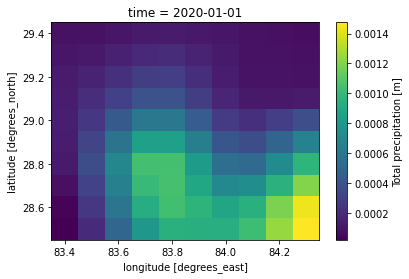

In [78]:
ds.tp.isel(time = 0).plot()

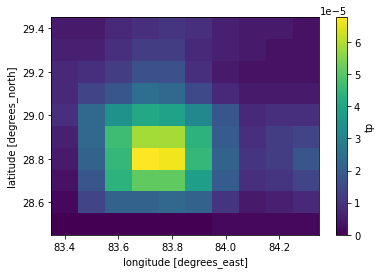

In [79]:
ds_cumsum_diff.tp.isel(time = 1).plot()

# test 

In [52]:
# Generate hourly date range
# start_date = "2020-01-01T01:00:00.000000000"
# end_date = "2022-12-31T23:00:00.000000000"
# date_range = pd.date_range(start=start_date, end=end_date, freq="H")

date_range = ds.isel(time=slice(1, None)).time
data = xr.Dataset(coords={"time": date_range, "latitude": ds.latitude, "longitude": ds.longitude})

data["tp"] = ds_cumsum_diff.tp

# Print the new xarray dataset
data


<xarray.Dataset>
Dimensions:    (time: 26303, latitude: 10, longitude: 10)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01T01:00:00 ... 2022-12-31T23:00:00
  * latitude   (latitude) float32 29.4 29.3 29.2 29.1 ... 28.8 28.7 28.6 28.5
  * longitude  (longitude) float32 83.4 83.5 83.6 83.7 ... 84.0 84.1 84.2 84.3
Data variables:
    tp         (time, latitude, longitude) float32 dask.array<chunksize=(8783, 10, 10), meta=np.ndarray>

In [21]:
# a = ds.isel(time=0)
# a.load()

<xarray.Dataset>
Dimensions:    (longitude: 10, latitude: 10)
Coordinates:
  * longitude  (longitude) float32 83.4 83.5 83.6 83.7 ... 84.0 84.1 84.2 84.3
  * latitude   (latitude) float32 29.4 29.3 29.2 29.1 ... 28.8 28.7 28.6 28.5
    time       datetime64[ns] 2020-01-01
Data variables:
    tp         (latitude, longitude) float32 0.08565 0.08565 ... 1.246 1.474
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-19 13:26:20 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [22]:
new_data = xr.concat([ds.isel(time=0), data], dim='time')


In [23]:
new_data

<xarray.Dataset>
Dimensions:    (longitude: 10, latitude: 10, time: 26304)
Coordinates:
  * longitude  (longitude) float32 83.4 83.5 83.6 83.7 ... 84.0 84.1 84.2 84.3
  * latitude   (latitude) float32 29.4 29.3 29.2 29.1 ... 28.8 28.7 28.6 28.5
  * time       (time) datetime64[ns] 2020-01-01 ... 2022-12-31T23:00:00
Data variables:
    tp         (latitude, longitude, time) float32 dask.array<chunksize=(10, 10, 1), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-19 13:26:20 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [31]:
# ds.tp.isel(time = 100).plot()

In [32]:
# ds_cumsum_diff.tp.isel(time = 99).plot()

In [53]:
''' calculate the sum within day, compare with the max within the same day in the original data '''
# slice coordinates
ds_cut = ds.sel(latitude=29.0, longitude=84.0, method='nearest')

data2 = data.sel(latitude=29.0, longitude=84.0, method='nearest')


In [54]:
# slice data - take a day  
start_date = '2021-01-30T00:00:00.000000000'
end_date   = '2021-02-24T23:00:00.000000000'


# Slice the dataset for a day 
ds_cut2 = ds_cut.sel(time=slice(start_date, end_date))
data3 = data2.sel(time=slice(start_date, end_date))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


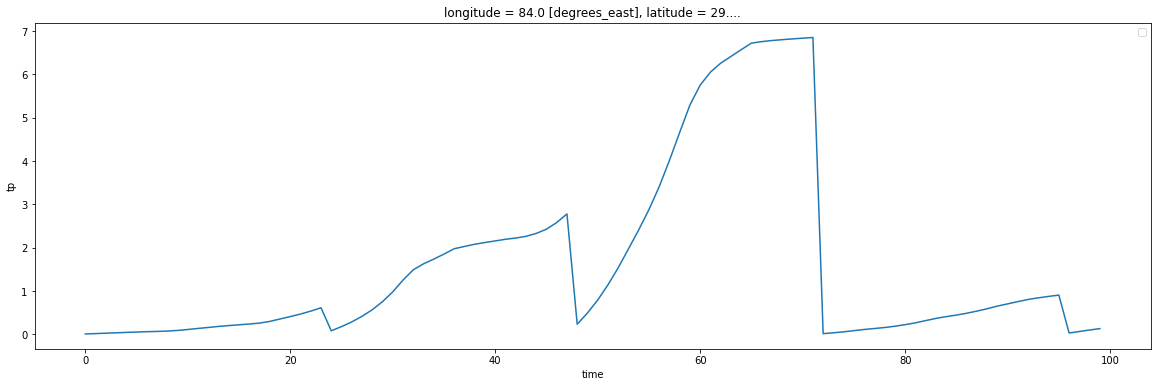

In [70]:
plt.figure(figsize = (20, 6))

# ds_cut2.tp.plot(label = 'original')
# data3.tp.plot(label = 'cumsum -> diff')

# ds_cumsum.sel(latitude=29.0, longitude=84.0, method='nearest').tp[:100].plot()
ds_cumsum_diff.sel(latitude=29.0, longitude=84.0, method='nearest').tp[:100].plot()
# ds.sel(latitude=29.0, longitude=84.0, method='nearest').tp[:100].plot()

plt.legend()

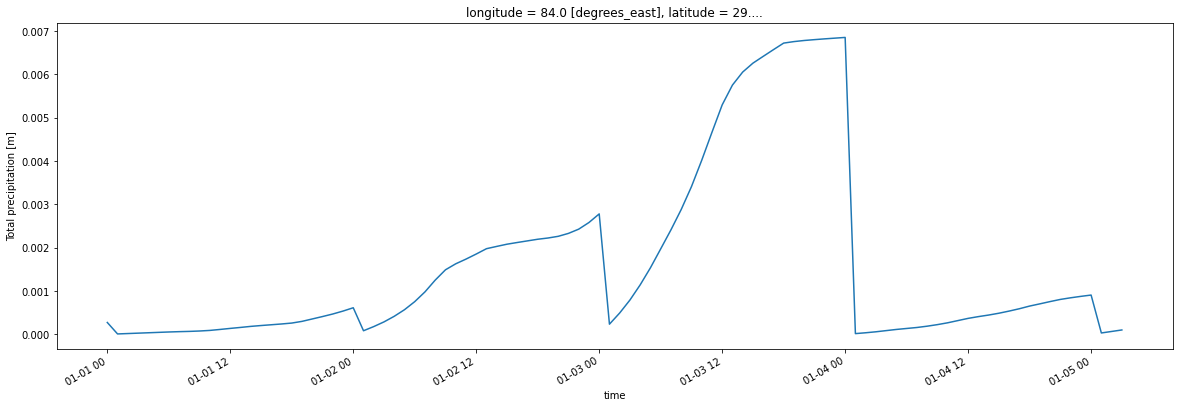

In [83]:
plt.figure(figsize = (20, 6))
ds.sel(latitude=29.0, longitude=84.0, method='nearest').tp[:100].plot()
# ds_cumsum.sel(latitude=29.0, longitude=84.0, method='nearest').tp[:100].plot()
# 

In [ ]:
new_data

In [ ]:
new_data2.tp.values

## check again



In [ ]:
''' calculate the sum within day, compare with the max within the same day in the original data '''
# slice coordinates
ds_cut = ds.sel(latitude=29.0, longitude=84.0, method='nearest')
new_data2 = new_data.sel(latitude=29.0, longitude=84.0, method='nearest')


In [ ]:
# new_data2.tp.plot()


In [ ]:
# slice data - take a day  
start_date = '2020-01-30T00:00:00.000000000'
end_date   = '2020-02-15T23:00:00.000000000'

# Slice the dataset for a day 
cut_sh = ds_cut.sel(time=slice(start_date, end_date))
cut_hourl = new_data2.sel(time=slice(start_date, end_date))

print('new hourly data - daily sum:', round(cut_hourl.tp.values.sum(), 6))
print('original data - daily max (cumulative sum):', round(cut_sh.tp.values.max(), 6))


In [ ]:
plt.figure(figsize = (20, 5))

# cut_hourl.tp.plot()
cut_sh.tp.plot()

new_data2.tp[900:1100].plot()